In [65]:
from cmdstanpy import CmdStanModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Prior selection

In [66]:
data = pd.read_csv("logistic_reg_data.csv", index_col=0)
data.describe()

,x1,x2,x3,x4,x5,y
count,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000
mean,-0.015777,0.334002,-0.001484,2.022817e-01,2.770684e-03,0.494000
std,0.578292,0.301507,0.383111,2.738984e-01,3.107472e-01,0.500465
min,-0.997592,0.000005,-0.992794,2.276756e-11,-9.880191e-01,0.000000
25%,-0.515144,0.064052,-0.136718,4.102616e-03,-3.628888e-02,0.000000
50%,-0.026042,0.254724,-0.000018,6.488454e-02,-1.278838e-08,0.000000
75%,0.475396,0.555544,0.107440,3.086316e-01,2.428165e-02,1.000000
max,0.999652,0.999305,0.998957,9.986100e-01,9.982628e-01,1.000000


In [67]:
model_ppc1 = CmdStanModel(stan_file='logistic_regression_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [68]:
R=1000
data_ppc= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=10)
sim_ppc1 = model_ppc1.sample(data=data_ppc,
                           iter_sampling=R, iter_warmup=0,
                           chains=1,
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


Task 1.
Plot histograms of beta for prior model

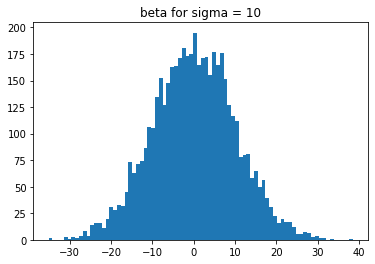

In [69]:
beta = sim_ppc1.stan_variable('beta')
plt.hist(beta.flatten(), bins=80)
plt.title('beta for sigma = 10')
plt.show()

Plot again the same histograms but this time with other sigma values. For instace use values: 5, 2, 0.75.

In [70]:
R=1000
data_ppc_5= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=5)
sim_ppc1_5 = model_ppc1.sample(data=data_ppc_5,
                           iter_sampling=R, iter_warmup=0,
                           chains=1,
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


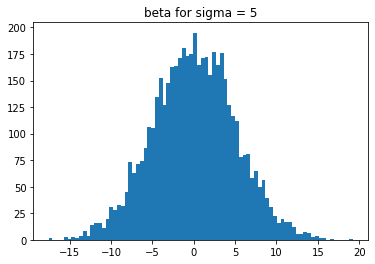

In [71]:
beta_5 = sim_ppc1_5.stan_variable('beta')
plt.hist(beta_5.flatten(), bins=80)
plt.title('beta for sigma = 5')
plt.show()

In [72]:
R=1000
data_ppc_2= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=2)
sim_ppc1_2 = model_ppc1.sample(data=data_ppc_2,
                           iter_sampling=R, iter_warmup=0,
                           chains=1,
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


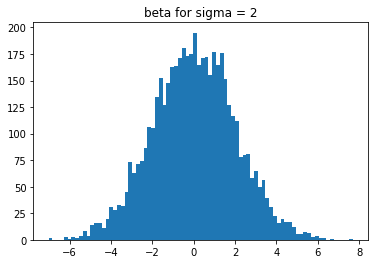

In [73]:
beta_2 = sim_ppc1_2.stan_variable('beta')
plt.hist(beta_2.flatten(), bins=80)
plt.title('beta for sigma = 2')
plt.show()

In [74]:
R=1000
data_ppc_075= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=0.75)
sim_ppc1_075 = model_ppc1.sample(data=data_ppc_075,
                           iter_sampling=R, iter_warmup=0,
                           chains=1,
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


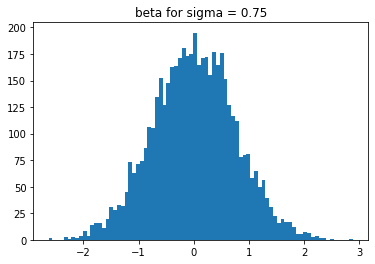

In [75]:
beta_075 = sim_ppc1_075.stan_variable('beta')
plt.hist(beta_075.flatten(), bins=80)
plt.title('beta for sigma = 0.75')
plt.show()

Posterior inference

In [76]:
model = CmdStanModel(stan_file='logistic_regression_vol2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [77]:
data_dict = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 y = data.y.values,
                 sigma= 0.75
                 )
fit = model.sample(data=data_dict, seed=4938483)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)
chain 2 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)

chain 3 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)


chain 4 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)

chain 3 |█▎        | 00:00 Iteration: 100 / 1000 [ 10%]  (Sampling)


chain 1 |█▊        | 00:00 Iteration: 200 / 1000 [ 20%]  (Sampling)
chain 2 |█▎        | 00:00 Iteration: 100 / 1000 [ 10%]  (Sampling)

chain 3 |██▎       | 00:00 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |██▎       | 00:00 Iteration: 300 / 1000 [ 30%]  (Sampling)
chain 2 |█▊        | 00:00 Iteration: 200 / 1000 [ 20%]  (Sampling)


chain 4 |██▎       | 00:00 Iteration: 300 / 1000 [ 30%]  (Sampling)

chain 1 |███▏      | 00:00 Iteration: 500 / 1000 [ 50%]  (Sampling)
chain 2 |██▎       | 00:00 


INFO:cmdstanpy:CmdStan done processing.


In [78]:
#plot
med_prob_ppc = np.percentile(fit.stan_variable('prob_ppc'),[25,50,75],axis=0)
estimate_ppc_df = pd.DataFrame(med_prob_ppc.T,columns = ['lo','med','hi'])

In [79]:
estimate_ppc_df['y'] = data.y
estimate_ppc_df.sort_values(by='med',inplace=True)
estimate_ppc_df

error_bar=np.array((
                    (estimate_ppc_df['med']-estimate_ppc_df['lo']).values,
                    (estimate_ppc_df['hi']-estimate_ppc_df['med']).values))

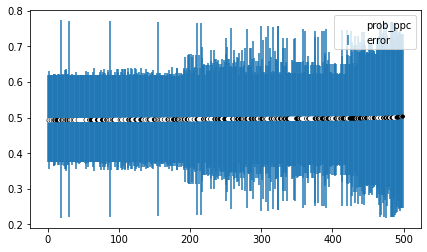

In [80]:
fig, axes = plt.subplots(1,1, figsize=(7, 4),sharex=True)

axes.scatter([*range(500)],estimate_ppc_df.med,marker='.',c=[(1.*k,1.*k,1.*k) for k in estimate_ppc_df.y])
axes.errorbar([*range(500)],estimate_ppc_df.med,yerr=error_bar,fmt='none',zorder=0)
axes.legend(['prob_ppc','error'])
plt.show()